## EDA Homes Data

Analyzing the homes dataset to uncover meaningful correlations and patterns among its variables.

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [32]:
df = pd.read_csv('data/homes.csv')
df.head(5)

,Sell,List,Living,Rooms,Beds,Baths,Age,Acres,Taxes
0,142,160.0,28.0,10.0,5.0,3.0,60.0,0.28,3167.0
1,175,180.0,18.0,8.0,4.0,1.0,12.0,0.43,4033.0
2,129,132.0,13.0,6.0,3.0,1.0,41.0,0.33,1471.0
3,138,140.0,17.0,7.0,3.0,1.0,22.0,0.46,3204.0
4,232,240.0,25.0,8.0,4.0,3.0,5.0,2.05,3613.0


### Descriptive statistical analysis
Summarize and understand the key characteristics of the dataset.

In [12]:
df.describe()

,List,Living,Rooms,Beds,Baths,Age,Acres,Taxes
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,178.340000,21.120000,8.060000,3.820000,1.860000,30.220000,1.020600,3706.100000
std,79.382723,8.351072,1.284285,0.690755,0.756199,30.962314,1.191496,1579.915268
min,90.000000,10.000000,5.000000,3.000000,1.000000,2.000000,0.220000,1445.000000
25%,140.000000,17.000000,7.000000,3.000000,1.000000,12.250000,0.382500,3107.000000
50%,160.000000,20.000000,8.000000,4.000000,2.000000,24.500000,0.550000,3490.000000
75%,190.000000,22.750000,9.000000,4.000000,2.000000,37.000000,1.182500,3919.250000
max,625.000000,64.000000,12.000000,6.000000,4.000000,202.000000,6.490000,12192.000000


### Examining correlations
Identify potential relationships and dependencies within the dataset.

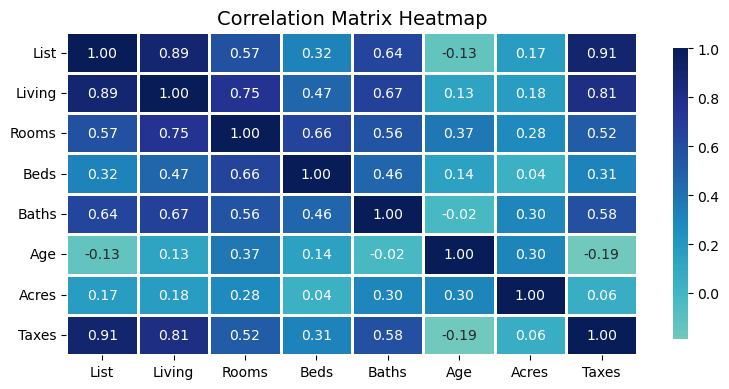

In [30]:
correlation_matrix = df.select_dtypes(include = 'number').corr()

# Set up the matplotlib figure
plt.figure(figsize=(8, 4))

# Create the heatmap
sns.heatmap(
    correlation_matrix,
    annot=True,         
    fmt=".2f",          
    cmap="YlGnBu",    
    center=0,           
    linewidths=0.8,     
    cbar_kws={"shrink": 0.9}
)

# Add title
plt.title("Correlation Matrix Heatmap", fontsize=14)
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

The correlation matrix reveals strong relationships among several variables in the dataset. Notably, features like taxes, living area, list price, and number of bathrooms show high interdependence, suggesting they play a significant role in housing valuation. In contrast, age exhibits consistently low correlation with other variables, indicating it may have limited predictive power. 
Similarly, acres appears to be less relevant in this context.

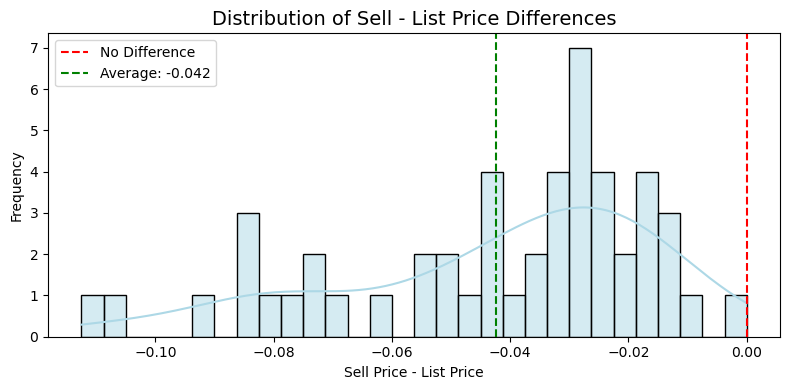

In [43]:
# Clean and convert columns to numeric
df['Sell'] = pd.to_numeric(df['Sell'].astype(str).str.replace(',', '').str.strip(), errors='coerce')
df['List'] = pd.to_numeric(df['List'].astype(str).str.replace(',', '').str.strip(), errors='coerce')

# Calculate the difference
df['price_diff'] = (df['Sell'] - df['List']) / df['List']

# Calculate the mean
mean_diff = df['price_diff'].mean()

# Plot the distribution
plt.figure(figsize=(8, 4))
sns.histplot(df['price_diff'], kde=True, color='lightblue', bins=30)

# Add vertical lines
plt.axvline(0, color='red', linestyle='--', label='No Difference')
plt.axvline(mean_diff, color='green', linestyle='--', label=f'Average: {mean_diff:,.3f}')

# Add labels and title
plt.title('Distribution of Sell - List Price Differences', fontsize=14)
plt.xlabel('Sell Price - List Price')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.show()


On average, homes sell for approximately 4.2% below their list price, indicating a modest but consistent gap between asking and final sale values. The distribution of these differences is quite wide, suggesting that while many homes sell close to their list price, there are notable cases where the list price is significantly over 10%. 

## Linear Regression

In [54]:
df_clean = df[['Taxes', 'Sell']].dropna()

# Reshape 'Taxes' for sklearn (2D array)
X = df_clean['Taxes'].values.reshape(-1, 1)
y = df_clean['Sell'].values

# Fit the model
reg1 = LinearRegression()
reg1.fit(X, y)

LinearRegression()

In [62]:
print(f"Intercept: {reg1.intercept_}")
print(f"Coefficient (Taxes): {reg1.coef_[0]}")
y_pred = reg1.predict(X)
r2 = r2_score(y, y_pred)
print(f"R-squared: {r2:.4f}")
mse = mean_squared_error(y, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse:.2f}")

Intercept: 16.87187910246172
Coefficient (Taxes): 0.04141499713918629
R-squared: 0.8088
Mean Squared Error: 991.81
Root Mean Squared Error: 31.49


Taxes appear to be a strong predictor of sell price, as indicated by an R2 value of 0.80, meaning that 80% of the variance in selling prices is explained by property taxes alone. The RMSE of 31 suggests that the model's average prediction error is relatively low and acceptable within the context of housing prices. Additionally, the positive coefficient for taxes implies a direct relationship: as property taxes increase, the expected selling price of the home tends to rise


In [65]:
df_clean = df[['Living', 'Sell']].dropna()

# Reshape 'Taxes' for sklearn (2D array)
X = df_clean['Living'].values.reshape(-1, 1)
y = df_clean['Sell'].values

# Fit the model
reg2 = LinearRegression()
reg2.fit(X, y)

LinearRegression()

In [66]:
print(f"Intercept: {reg2.intercept_}")
print(f"Coefficient (Taxes): {reg2.coef_[0]}")
y_pred = reg2.predict(X)
r2 = r2_score(y, y_pred)
print(f"R-squared: {r2:.4f}")
mse = mean_squared_error(y, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse:.2f}")

Intercept: 8.553141679932565
Coefficient (Taxes): 7.661309579548647
R-squared: 0.7733
Mean Squared Error: 1175.96
Root Mean Squared Error: 34.29


When using Living area as the sole predictor of sell price, the model achieves an R2 of 0.77 and an RMSE of 34. While this still indicates a strong relationship, it's slightly weaker than the model using Taxes as the predictor
